In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


** Importing Data from Drive To be shared for all group members**

In [ ]:
import pandas as pd


url = "https://drive.google.com/uc?id=1_2iJGfbLkY615-lQMDM4eZPkkxVajeyY"


df = pd.read_csv(url)


df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df = df.drop(columns=['deposit'])

**Important Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler




**This is an exploration of data**

In [ ]:
df.shape

(11162, 16)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**As we notice that  null values  written as unknown so I retrieve it null to easy solve this problem**

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.replace("unknown", np.nan)

In [ ]:
df.isna().sum()

,0
age,0
job,70
marital,0
education,497
default,0
balance,0
housing,0
loan,0
contact,2346
day,0


**   we will fill missing categorical values with mode**

In [ ]:
df.select_dtypes(include="object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

** we detect with is Categorical Data  and have null values we find(poutcome ///  contact ///  eduction // job) as we notice all columns that have null values is cateogical so we will impute them with mode **

In [ ]:
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1936385350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


** we replace each null value with mode of this col and make inplace= True to change in the original Dataset**

** Now, we solve the null values (missings problem)...Make summary statistics to check normality and handle outliers**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


** Check cateogrical Distribution**

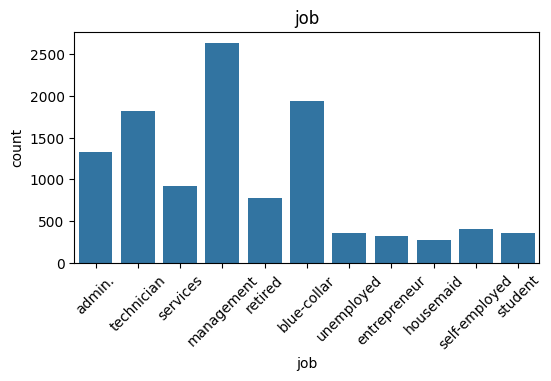

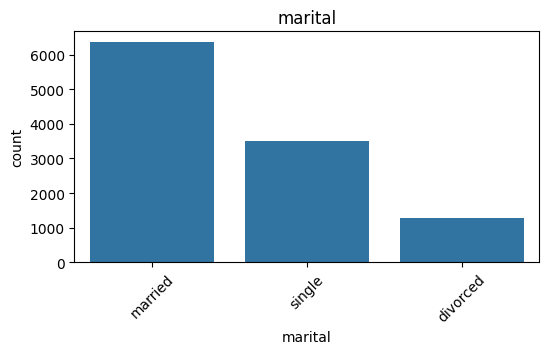

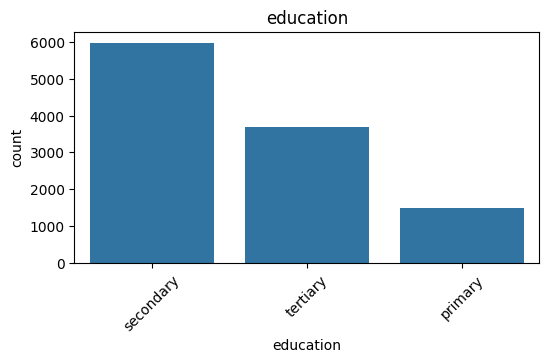

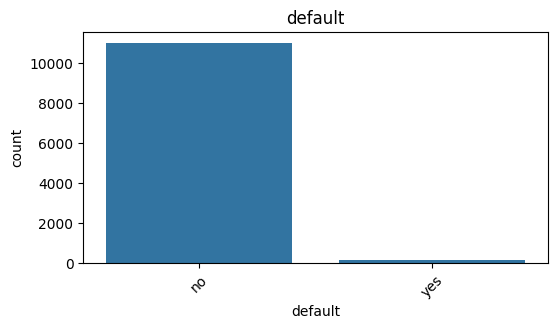

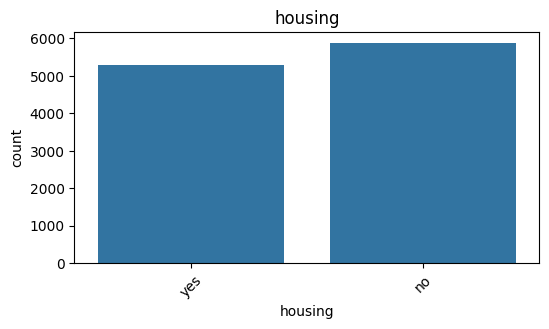

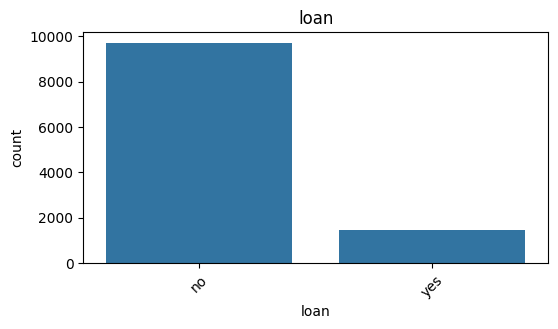

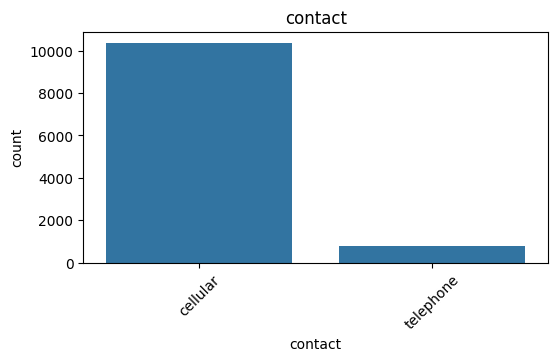

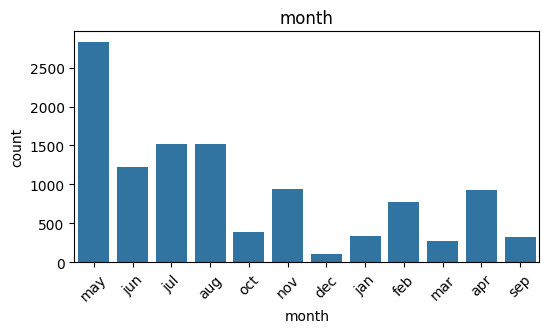

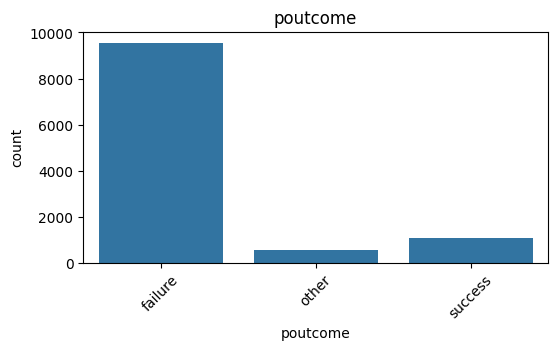

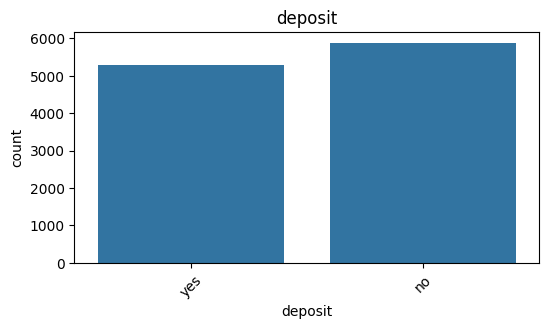

In [ ]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

** Poutcome is not balanced /// month has an outlier in May///Contact is imbalance ///loan is imbalance //// default is imbalance and Job has an outlier**

** Visualize Outliers**

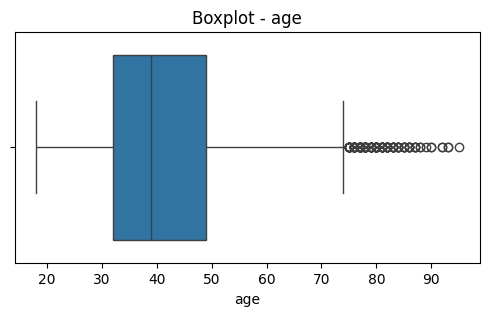

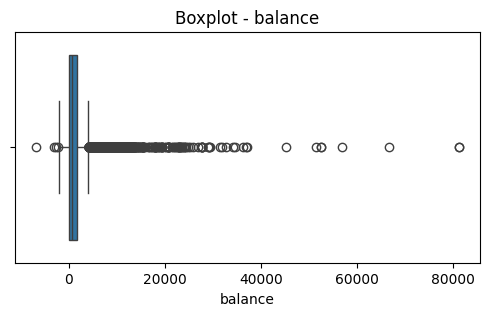

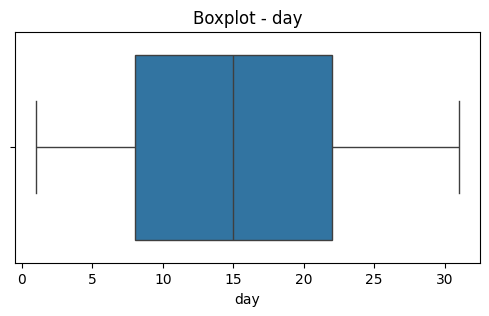

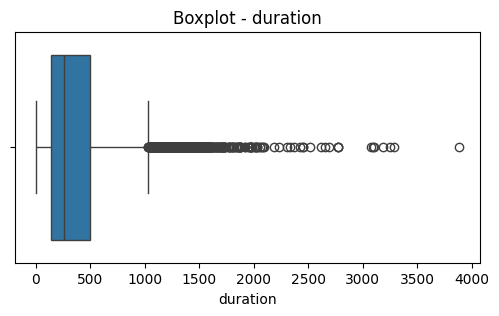

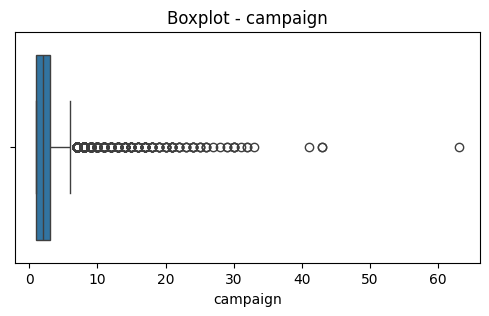

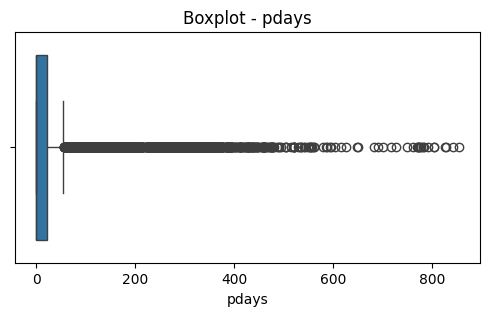

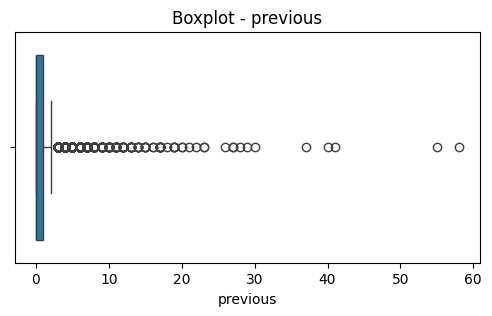

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=col)
    plt.title("Boxplot - " + col)
    plt.show()

**Correlation (Heatmap)**

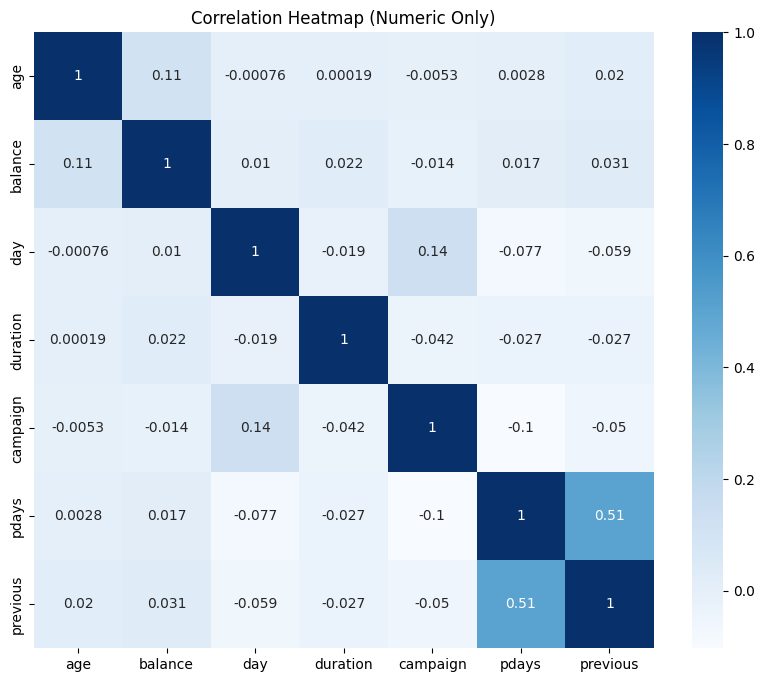

In [ ]:
plt.figure(figsize=(10,8))
num_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()

**One Hot encoding for the rest of them**

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,59,2343,5,1042,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,56,45,5,1467,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,54,184,5,673,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False


** Scaling Numerical Features to prevent Bias**

In [ ]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']

In [ ]:
df_encoded[num_cols] = StandardScaler().fit_transform(df_encoded[num_cols])

In [ ]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:


import pandas as pd

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers in numeric columns only
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

print(outliers.sum())  # Number of outliers per numeric column



age          171
balance     1055
day            0
duration     636
campaign     601
pdays       2750
previous    1258
dtype: int64


In [ ]:

df_capped = df.copy()
for col in numeric_cols:
    lower_limit = Q1[col] - 1.5 * IQR[col]
    upper_limit = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = df_capped[col].clip(lower=lower_limit, upper=upper_limit)


import numpy as np
df_capped['balance_log'] = np.log1p(df_capped['balance'])
df_capped['pdays_log'] = np.log1p(df_capped['pdays'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_processed = df.copy()

# for numerical columns only
numeric_cols = df_processed.select_dtypes(include='number').columns


Q1 = df_processed[numeric_cols].quantile(0.25)
Q3 = df_processed[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

log_cols = ['balance', 'pdays']

for col in numeric_cols:
    # Capping for all cols except log
    if col not in log_cols:
        lower_limit = Q1[col] - 1.5 * IQR[col]
        upper_limit = Q3[col] + 1.5 * IQR[col]
        df_processed[col] = df_processed[col].clip(lower=lower_limit, upper=upper_limit)

# Log transformation for Big columns
for col in log_cols:
    #Prevent any negative values
    df_processed[col] = np.log1p(df_processed[col].clip(lower=0))


print("Summary after preprocessing:")
print(df_processed.describe())

Summary after preprocessing:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.152347      5.617849     15.658036    352.948486      2.238577   
std       11.659113      2.657302      8.420740    284.714889      1.521158   
min       18.000000      0.000000      1.000000      2.000000      1.000000   
25%       32.000000      4.812184      8.000000    138.000000      1.000000   
50%       39.000000      6.311735     15.000000    255.000000      2.000000   
75%       49.000000      7.443664     22.000000    496.000000      3.000000   
max       74.500000     11.304732     31.000000   1033.000000      6.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean       1.304331      0.485397  
std        2.262713      0.892563  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%    

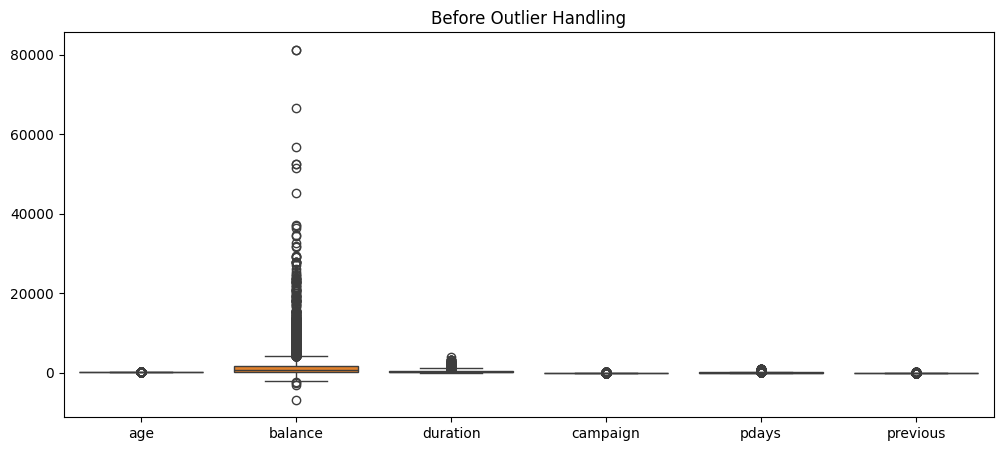

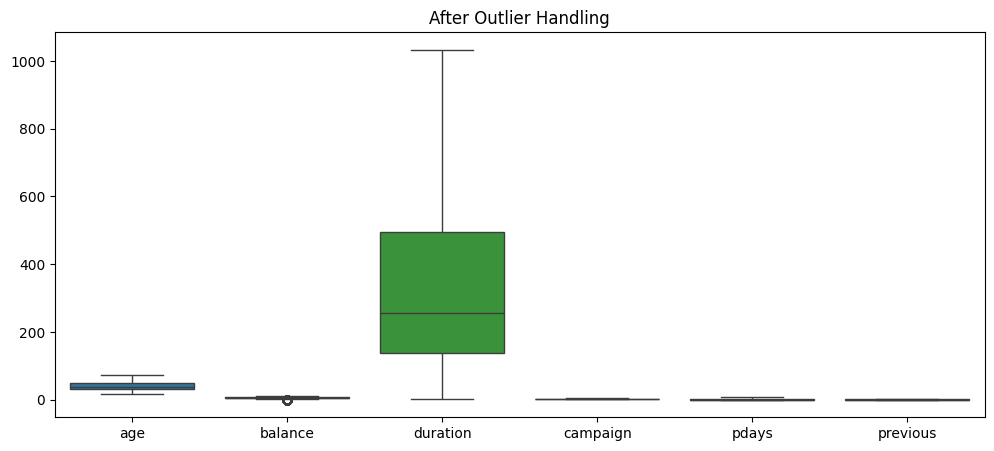

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Before Logging and capping:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['age','balance','duration','campaign','pdays','previous']])
plt.title("Before Outlier Handling")
plt.show()

#After:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_processed[['age','balance','duration','campaign','pdays','previous']])
plt.title("After Outlier Handling")
plt.show()


** To Show Distribution after and before handling Outliers**

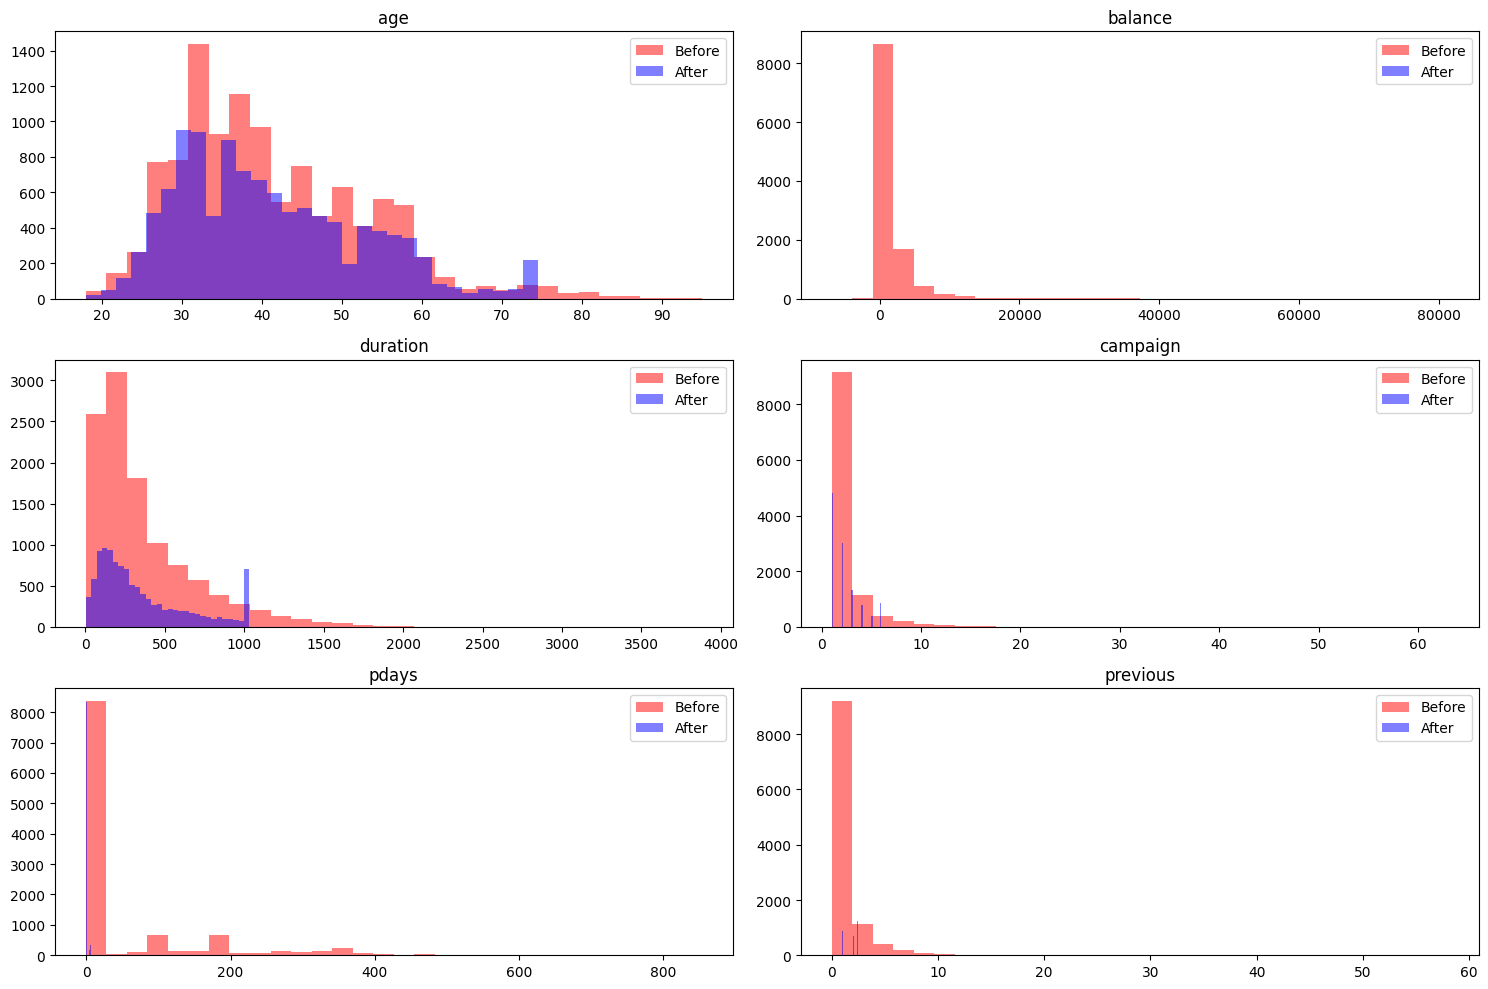

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = ['age','balance','duration','campaign','pdays','previous']

# Plot distributions
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    plt.hist(df[col], bins=30, alpha=0.5, label='Before', color='red')
    plt.hist(df_processed[col], bins=30, alpha=0.5, label='After', color='blue')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,1
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,failure,1
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,1
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,failure,1
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,failure,0
11158,39,services,married,secondary,no,733,no,no,cellular,16,jun,83,4,-1,0,failure,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,failure,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [ ]:
save_path = '/content/preprocessed_data.csv'
df_processed.to_csv(save_path, index=False)
print(f"File saved locally at {save_path}")

from google.colab import files
files.download(save_path)

File saved locally at /content/preprocessed_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **DBscan Algorithms **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kneed

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from umap import UMAP
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML_project/preprocessed_data.csv")

In [ ]:
# Select only numeric columns automatically
df_numeric = data.select_dtypes(include=['float64'])

print("Numeric columns:", df_numeric.columns.tolist())
print("Shape:", df_numeric.shape)

Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Shape: (11162, 7)


## Now We Make some Visulization to Know shape of data

### Digram using PCA

Shape of PCA = (11162, 2)


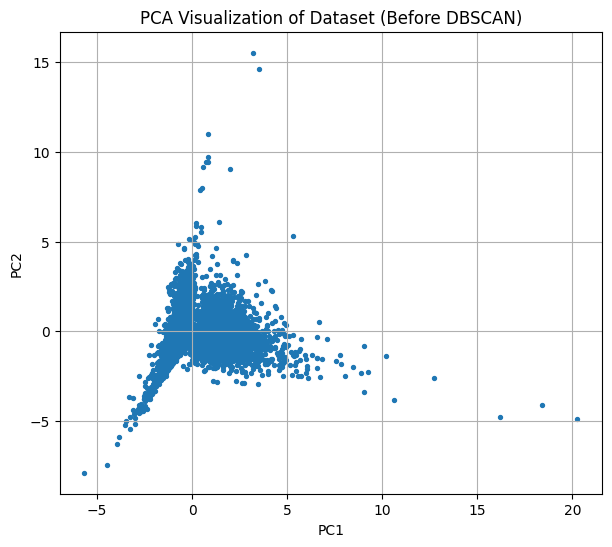

In [ ]:
pca = PCA(n_components=2)  # to reduce the feature
X_2d = pca.fit_transform(df_numeric)

print("Shape of PCA =", X_2d.shape)
plt.figure(figsize=(7,6))
plt.scatter(X_2d[:,0], X_2d[:,1], s=8)
plt.title("PCA Visualization of Dataset (Before DBSCAN)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


### shape using T-SNE

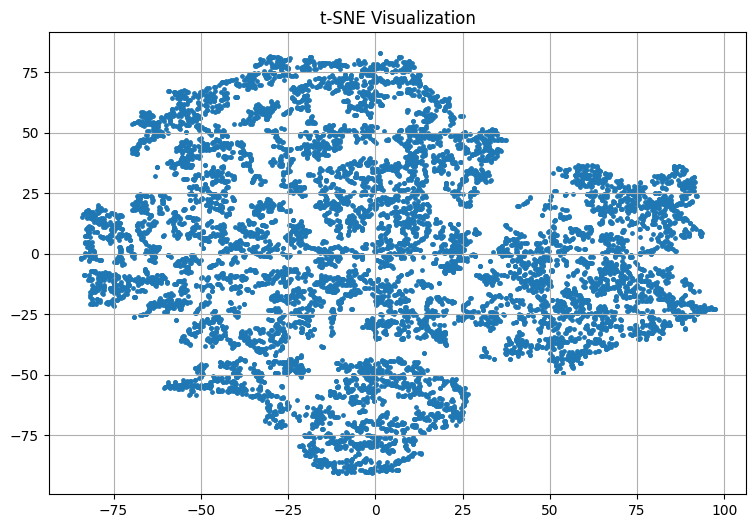

In [ ]:
X_input = df_numeric.copy()

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    init='pca',
    learning_rate='auto'
)

X_tsne = tsne.fit_transform(X_input)

plt.figure(figsize=(9,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=6)
plt.title("t-SNE Visualization")
plt.grid(True)
plt.show()


### shape using UMAP

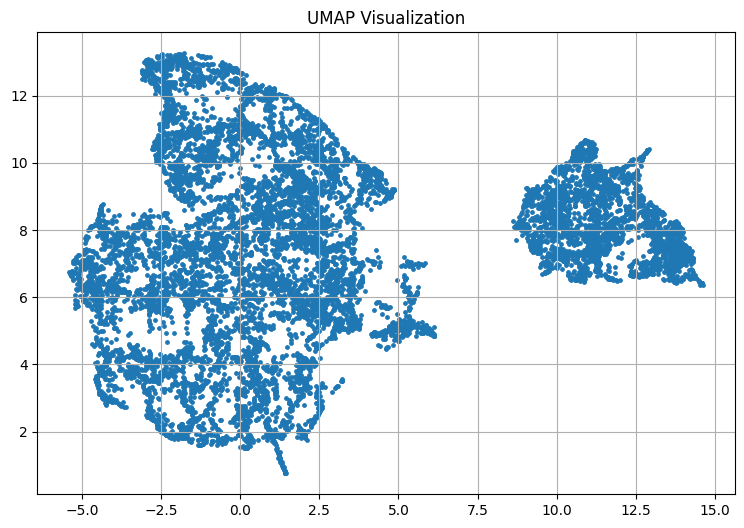

In [ ]:
reducer = UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(df_numeric)

plt.figure(figsize=(9,6))
plt.scatter(X_umap[:,0], X_umap[:,1], s=6)
plt.title("UMAP Visualization")
plt.grid(True)
plt.show()

## Eps, and min_samples

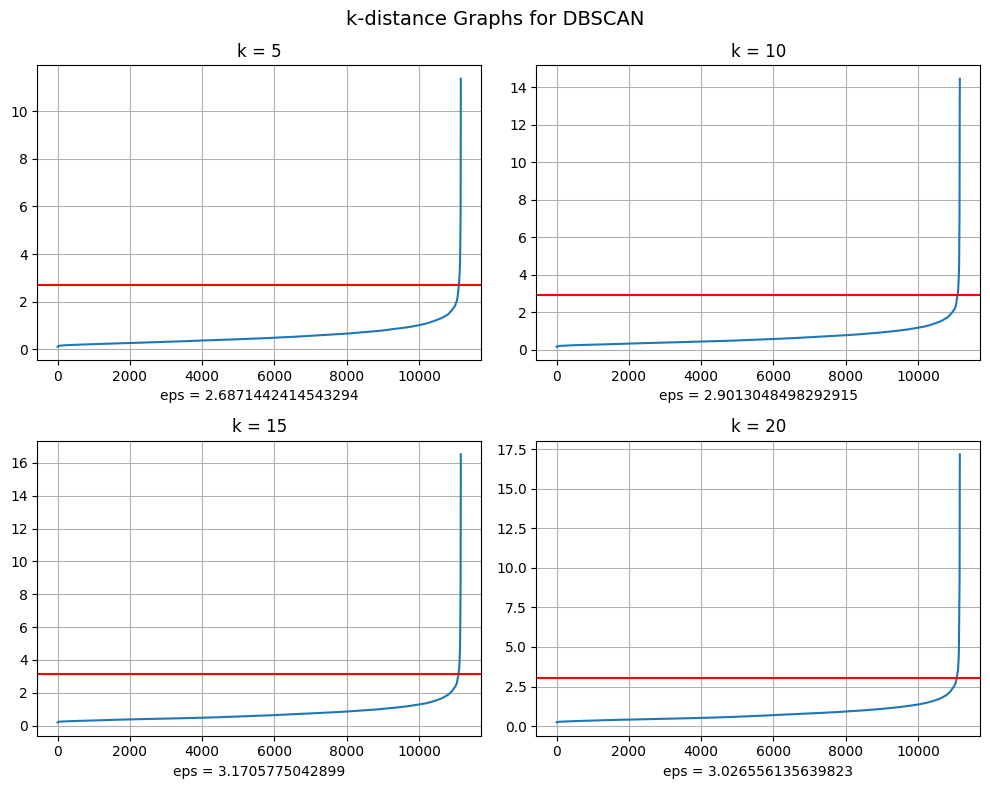

In [ ]:
def auto_eps(x, k):

    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(df_numeric)
    distances, indices = nbrs.kneighbors(x)
    k_dist = np.sort(distances[:, k-1])
    knee = KneeLocator(range(len(k_dist)), k_dist,
                       curve='convex', direction='increasing')

    eps = knee.knee_y
    return eps, k_dist

ks = [5,10,15, 20]
results = []

for k in ks:
    eps, dist = auto_eps(df_numeric, k)
    results.append((k, eps, dist))

fig, axes = plt.subplots(2,2, figsize=(10,8))

for ax, (k, eps, dist) in zip(axes.flatten(), results):
    ax.plot(dist)
    ax.axhline(eps, color='red')
    ax.set_title(f"k = {k}")
    ax.grid(True)
    ax.set_xlabel(f"eps = {eps}")

plt.suptitle("k-distance Graphs for DBSCAN", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
X = df_numeric.copy()

## model using random parameter

In [ ]:
model = DBSCAN(
    eps = 1.4,
    min_samples = 5
)

labels = model.fit_predict(X)

print("clusters =", np.unique(labels))
print("num clusters =", len(np.unique(labels)))
print("noise =", np.sum(labels == -1))

X["cluster"] = labels

clusters = [-1  0  1  2  3]
num clusters = 5
noise = 237


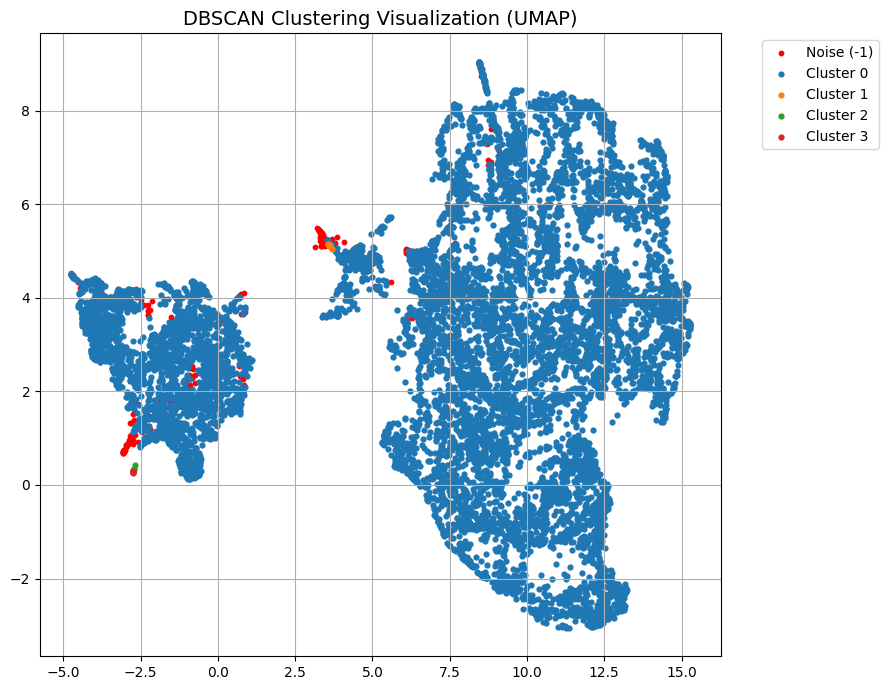

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_2d = reducer.fit_transform(X)

plt.figure(figsize=(9,7))

unique_clusters = np.unique(labels)

for c in unique_clusters:

    if c == -1:
        # noise in red
        plt.scatter(
            X_2d[labels == c, 0],
            X_2d[labels == c, 1],
            s = 10,
            c = "red",
            label = "Noise (-1)"
        )
    else:
        plt.scatter(
            X_2d[labels == c, 0],
            X_2d[labels == c, 1],
            s = 12,
            label = f"Cluster {c}"
        )


plt.title("DBSCAN Clustering Visualization (UMAP)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X.drop(columns="cluster", axis=1, inplace=True)

## Evaluation

In [ ]:
def evaluate_clusters_ranges(X, labels):
    results = {}

    silhouette_range = "[-1 , 1]"
    silhouette_ideal = "Closer to 1 is better"

    if len(set(labels)) > 1:
        sil = silhouette_score(X, labels)
    else:
        sil = None

    mask = labels != -1
    if len(set(labels[mask])) > 1:
        sil_wo = silhouette_score(X[mask], labels[mask])
    else:
        sil_wo = None


    db_range = "[0 , +∞)"
    db_ideal = "Closer to 0 is better"
    db = davies_bouldin_score(X, labels)


    ch_range = "[0 , +∞) (unbounded)"
    ch_ideal = "Higher values indicate better-defined clusters"
    ch = calinski_harabasz_score(X, labels)


    results = {
        "silhouette": {
            "value": sil,
            "range": silhouette_range,
            "ideal": silhouette_ideal
        },
        "silhouette_without_noise": {
            "value": sil_wo,
            "range": silhouette_range,
            "ideal": silhouette_ideal
        },
        "davies_bouldin": {
            "value": db,
            "range": db_range,
            "ideal": db_ideal
        },
        "calinski_harabasz": {
            "value": ch,
            "range": ch_range,
            "ideal": ch_ideal
        }
    }

    return results

In [ ]:
metrics = evaluate_clusters_ranges(X, labels)

for name, info in metrics.items():
    print(f"{name}:")
    print("  Value =", info["value"])
    print("  Range =", info["range"])
    print("  Ideal =", info["ideal"])
    print()

silhouette:
  Value = 0.4891139962008231
  Range = [-1 , 1]
  Ideal = Closer to 1 is better

silhouette_without_noise:
  Value = 0.5083838763336387
  Range = [-1 , 1]
  Ideal = Closer to 1 is better

davies_bouldin:
  Value = 1.6046846660616254
  Range = [0 , +∞)
  Ideal = Closer to 0 is better

calinski_harabasz:
  Value = 176.82172878133179
  Range = [0 , +∞) (unbounded)
  Ideal = Higher values indicate better-defined clusters



## using Grid search to get the best eps and min_samples

In [ ]:
def best_dbscan_params(X, eps_list, min_samples_list):
    best_score = -1
    best_params = {"eps": None, "min_samples": None}

    for eps in eps_list:
        for ms in min_samples_list:

            labels = DBSCAN(eps=eps, min_samples=ms).fit_predict(X)


            mask = labels != -1

            if len(set(labels[mask])) < 2:
                continue

            try:
                score = silhouette_score(X[mask], labels[mask])
            except:
                continue

            if score > best_score:
                best_score = score
                best_params = {"eps": eps, "min_samples": ms}

    return best_params, best_score

In [ ]:
eps_values = np.arange(0.1, 3.3, 0.1)
min_samples_values = [3, 5, 7, 10, 15, 20]

best_params, best_score = best_dbscan_params(X, eps_values, min_samples_values)

print("Best params:", best_params)
print("Best silhouette score:", best_score)

Best params: {'eps': np.float64(1.8000000000000003), 'min_samples': 3}
Best silhouette score: 0.7839770892272353


In [ ]:
model = DBSCAN(
    eps = 1.8,
    min_samples = 3
)

labels = model.fit_predict(X)

print("clusters =", np.unique(labels))
print("num clusters =", len(np.unique(labels)))
print("noise =", np.sum(labels == -1))

X["cluster"] = labels

clusters = [-1  0  1]
num clusters = 3
noise = 80


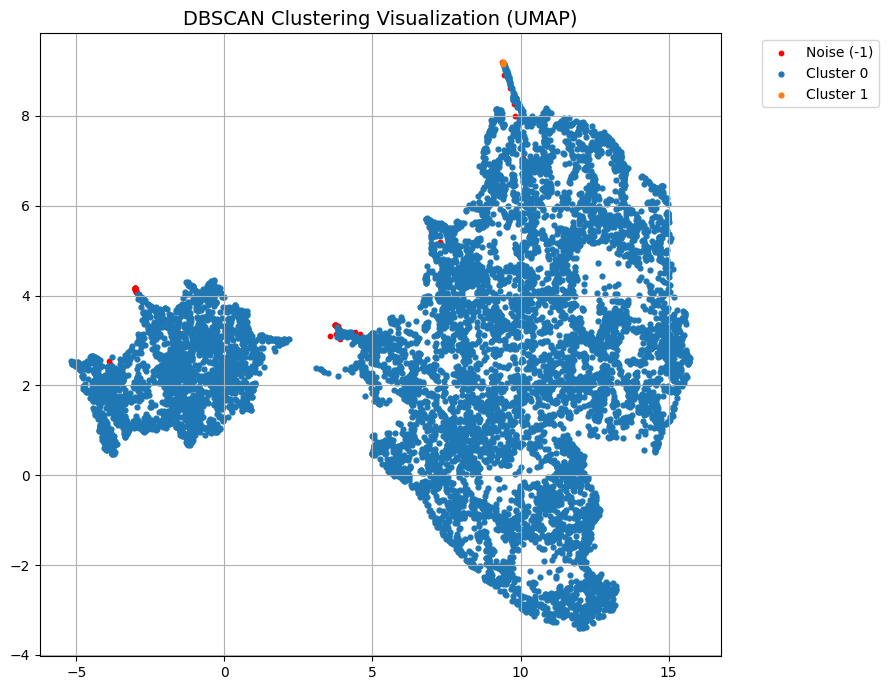

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_2d = reducer.fit_transform(X)

plt.figure(figsize=(9,7))

unique_clusters = np.unique(labels)

for c in unique_clusters:

    if c == -1:
        # noise in red
        plt.scatter(
            X_2d[labels == c, 0],
            X_2d[labels == c, 1],
            s = 10,
            c = "red",
            label = "Noise (-1)"
        )
    else:
        plt.scatter(
            X_2d[labels == c, 0],
            X_2d[labels == c, 1],
            s = 12,
            label = f"Cluster {c}"
        )


plt.title("DBSCAN Clustering Visualization (UMAP)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
metrics = evaluate_clusters_ranges(X, labels)

for name, info in metrics.items():
    print(f"{name}:")
    print("  Value =", info["value"])
    print("  Range =", info["range"])
    print("  Ideal =", info["ideal"])
    print()

silhouette:
  Value = 0.6840046447817918
  Range = [-1 , 1]
  Ideal = Closer to 1 is better

silhouette_without_noise:
  Value = 0.7844934381333243
  Range = [-1 , 1]
  Ideal = Closer to 1 is better

davies_bouldin:
  Value = 1.346604673949109
  Range = [0 , +∞)
  Ideal = Closer to 0 is better

calinski_harabasz:
  Value = 277.9513555728162
  Range = [0 , +∞) (unbounded)
  Ideal = Higher values indicate better-defined clusters



## **k mean algorithm **

In [ ]:
# Cell 1: Import libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# Cell 2: Load and inspect data
df = pd.read_csv(url)
print(f"Data shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nColumns: {len(df.columns)} columns")

Data shape: (11162, 17)

First few rows:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Columns: 17 columns


In [ ]:
numeric_cols = []
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        if df[col].nunique() > 10:  # Likely continuous
            numeric_cols.append(col)

print(f"Continuous features selected for clustering: {numeric_cols}")
print(f"Number of continuous features: {len(numeric_cols)}")

# Extract features for clustering
X = df[numeric_cols].copy()

Continuous features selected for clustering: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Number of continuous features: 7


In [ ]:
print("Finding optimal K")

# Calculate WCSS for different K values
wcss = []
silhouette_scores = []
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)


        db_score = davies_bouldin_score(X, kmeans.labels_)
        db_scores.append(db_score)

Finding optimal K


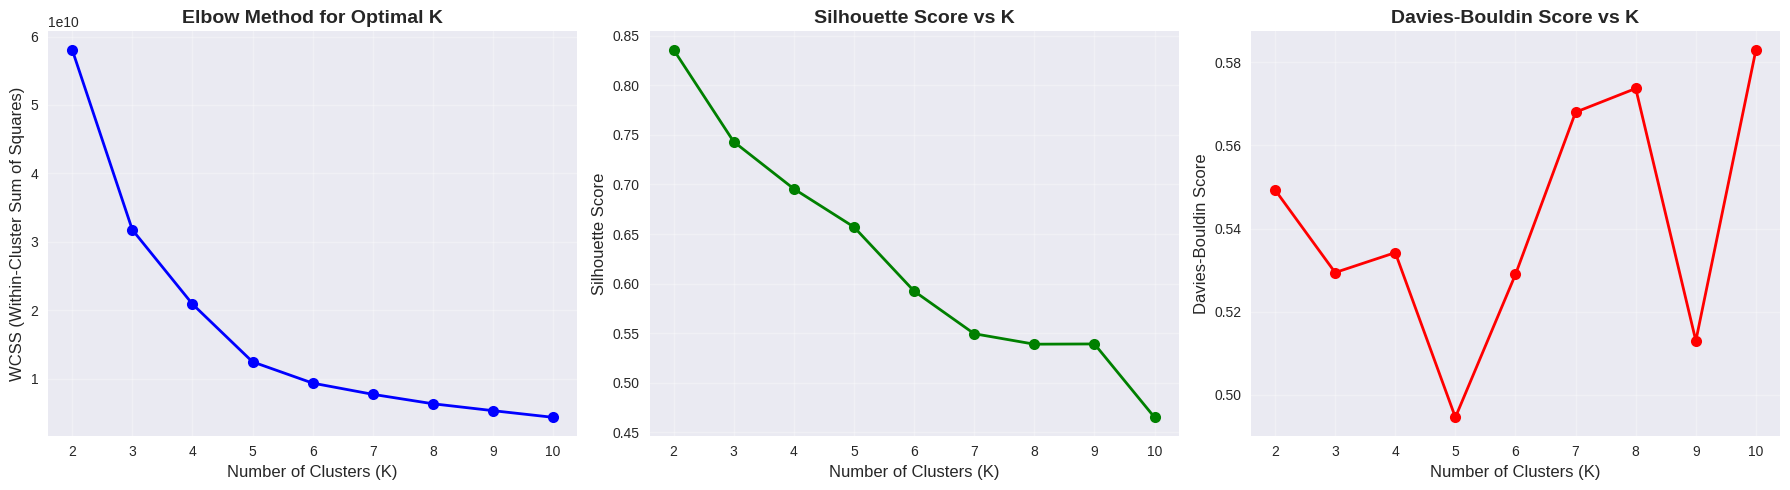

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs K', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

axes[2].plot(k_range, db_scores, 'ro-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[2].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[2].set_title('Davies-Bouldin Score vs K', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"Optimal K based on Silhouette Score: {optimal_k_silhouette}")
print(f"Maximum Silhouette Score: {max(silhouette_scores):.4f}")
diff = np.diff(wcss)
diff_ratio = diff[1:] / diff[:-1]
optimal_k_elbow = k_range[np.argmin(diff_ratio) + 2]
print(f"Suggested K based on Elbow Method: {optimal_k_elbow}")

Optimal K based on Silhouette Score: 2
Maximum Silhouette Score: 0.8361
Suggested K based on Elbow Method: 6


In [ ]:
use_optimal = input(f"Use optimal K={optimal_k_silhouette}? (y/n): ").lower()

if use_optimal == 'y':
    n_clusters = optimal_k_silhouette
else:
    n_clusters = int(input("Enter number of clusters: "))

Use optimal K=2? (y/n): y


In [ ]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
X['Cluster'] = clusters

print(f"Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

Cluster distribution:
Cluster
0    10709
1      453
Name: count, dtype: int64


In [ ]:
cluster_means = X.groupby('Cluster').mean()

print("\nCluster Centroids (means):")
print(cluster_means.round(3))

global_means = X.drop('Cluster', axis=1).mean()
cluster_deviations = cluster_means.copy()
for col in cluster_deviations.columns:
    cluster_deviations[col] = np.abs(cluster_deviations[col] - global_means[col])

print("\nMost distinguishing features per cluster:")
for cluster in range(n_clusters):
    top_features = cluster_deviations.loc[cluster].nlargest(3).index.tolist()
    print(f"Cluster {cluster}: {', '.join(top_features)}")



Cluster Centroids (means):
            age    balance     day  duration  campaign   pdays  previous
Cluster                                                                 
0        41.091   1053.610  15.647   371.631     2.502  51.184      0.83
1        44.567  12755.934  15.909   380.576     2.651  54.781      0.89

Most distinguishing features per cluster:
Cluster 0: balance, duration, pdays
Cluster 1: balance, duration, pdays


PCA Explained Variance: PC1=98.74%, PC2=1.14%


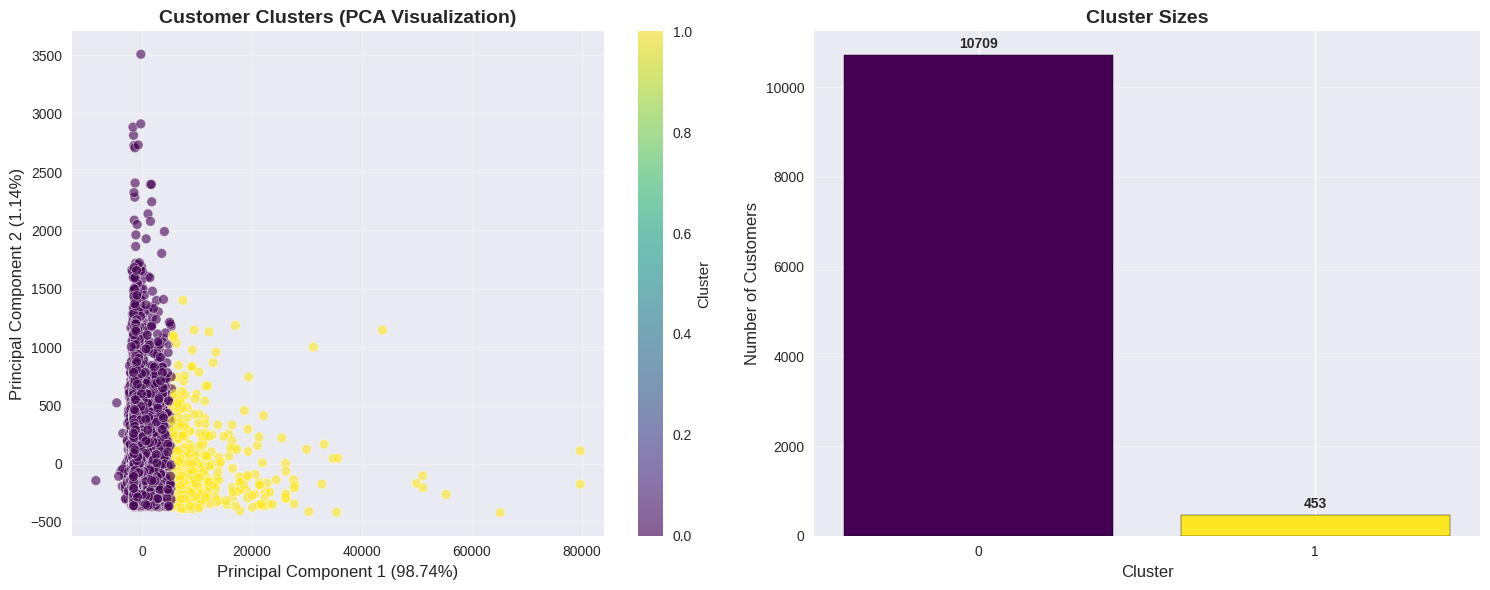

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.drop('Cluster', axis=1))

viz_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': clusters
})

print(f"PCA Explained Variance: PC1={pca.explained_variance_ratio_[0]:.2%}, "
      f"PC2={pca.explained_variance_ratio_[1]:.2%}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

scatter = axes[0].scatter(viz_df['PC1'], viz_df['PC2'], c=viz_df['Cluster'],
                         cmap='viridis', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)
axes[0].set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
axes[0].set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
axes[0].set_title('Customer Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Cluster')

cluster_sizes = df['Cluster'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
axes[1].bar(range(n_clusters), cluster_sizes.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Cluster Sizes', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(n_clusters))
axes[1].grid(True, alpha=0.3, axis='y')

for i, size in enumerate(cluster_sizes.values):
    axes[1].text(i, size + max(cluster_sizes.values)*0.01, str(size),
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('clustered_customers.csv', index=False)

report = f"""
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset: preprocessed_data.csv
Number of clusters: {n_clusters}
Number of customers: {len(df)}
Features used: {', '.join(numeric_cols)}

{df['Cluster'].value_counts().sort_index().to_string()}

CLUSTER CENTROIDS:
{cluster_means.round(3).to_string()}

PERFORMANCE METRICS:
- Silhouette Score: {silhouette_score(X.drop('Cluster', axis=1), clusters):.4f}
- Davies-Bouldin Score: {davies_bouldin_score(X.drop('Cluster', axis=1), clusters):.4f}
- WCSS: {kmeans.inertia_:.2f}
"""

with open('clustering_report.txt', 'w') as f:
    f.write(report)




In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

X_features = X.drop('Cluster', axis=1)
labels = df['Cluster'].values

silhouette = silhouette_score(X_features, labels)
calinski = calinski_harabasz_score(X_features, labels)
davies = davies_bouldin_score(X_features, labels)
wcss = kmeans.inertia_

print(f"{'Metric':<25} {'Value':<15} {'Interpretation':<30}")
print("-"*70)

if silhouette > 0.7:
    interpretation = "EXCELLENT (Strong structure)"
elif silhouette > 0.5:
    interpretation = "GOOD (Reasonable structure)"
elif silhouette > 0.25:
    interpretation = "FAIR (Weak structure)"
else:
    interpretation = "POOR (No substantial structure)"
print(f"{'Silhouette Score':<25} {silhouette:<15.4f} {interpretation:<30}")

print(f"{'Calinski-Harabasz':<25} {calinski:<15.2f} {'Higher = better separation':<30}")

if davies < 0.5:
    interpretation = "EXCELLENT"
elif davies < 1.0:
    interpretation = "GOOD"
elif davies < 1.5:
    interpretation = "FAIR"
else:
    interpretation = "POOR"
print(f"{'':<25} {davies:<15.4f} {interpretation:<30}")

print(f"{'WCSS (Inertia)':<25} {wcss:<15.2f} {'Lower = better':<30}")

unique_labels, counts = np.unique(labels, return_counts=True)
print(f"\n{'Cluster Statistics':<25}")
print("-"*40)
print(f"{'Number of clusters':<25} {len(unique_labels)}")
print(f"{'Total samples':<25} {len(labels)}")

for label, count in zip(unique_labels, counts):
    percentage = (count / len(labels)) * 100
    print(f"  Cluster {label}: {count} samples ({percentage:.1f}%)")



Metric                    Value           Interpretation                
----------------------------------------------------------------------
Silhouette Score          0.8361          EXCELLENT (Strong structure)  
Calinski-Harabasz         11437.85        Higher = better separation    
                          0.5493          GOOD                          
WCSS (Inertia)            58072362636.89  Lower = better                

Cluster Statistics       
----------------------------------------
Number of clusters        2
Total samples             11162
  Cluster 0: 10709 samples (95.9%)
  Cluster 1: 453 samples (4.1%)
